In [3]:
from bs4 import BeautifulSoup
import requests

In [ ]:
url = 'https://www.consumercomplaints.in/reliance-jio-infocomm-b115543'
response = requests.get(url, headers={'User-agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.120 Safari/537.36'})

soup = BeautifulSoup(response.content, "lxml")

In [38]:
complaints = []
k = 0
while k < 5:
    url = 'https://www.consumercomplaints.in/reliance-jio-infocomm-b115543/page/' + str(i)
    response = requests.get(url, headers={'User-agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.120 Safari/537.36'})

    soup = BeautifulSoup(response.content, "lxml")
    listOfComplaints = soup.findAll('td', attrs = {'class': 'complaint'})
    for complaint in listOfComplaints:
        complaints.append(complaint.find('a').get_text())
        #print(complaints[i])
        #i = i + 1
        #print('---------------')
    i = i + 1
    k = k + 1
    print(complaints)

['Reliance Jio Infocomm — bill generation issue with mobile number 9123616315', 'Reliance Jio Infocomm — no mobile signal', 'Reliance Jio Infocomm — outgoing voice services has been discontinued', 'Reliance Jio Infocomm — dnd service', 'Reliance Jio Infocomm — not getting replacement from store and corporate office of my lost sim card', 'Reliance Jio — wrong money deducted in my account.', 'Reliance Jio Infocomm — amount deducted from bank but recharge not done', 'Jio — poor network speed', 'Reliance Jio Infocomm — international roaming in colombia', 'Reliance Jio Infocomm — 5 days pre-reminder calls for recharging', 'Reliance Jio Infocomm — outgoing calls disconnected for a unlimited 399 plan with 84 days validity', 'Reliance Jio Infocomm — jio mobile phone booking', 'Reliance Jio Infocomm — fake calls and messages from pakistan', 'Reliance Jio Infocomm — fake calls and messages', 'Reliance Jio — removing the mobile towers', 'Reliance Jio Infocomm — double payment made during online r

['Reliance Jio Infocomm — bill generation issue with mobile number 9123616315', 'Reliance Jio Infocomm — no mobile signal', 'Reliance Jio Infocomm — outgoing voice services has been discontinued', 'Reliance Jio Infocomm — dnd service', 'Reliance Jio Infocomm — not getting replacement from store and corporate office of my lost sim card', 'Reliance Jio — wrong money deducted in my account.', 'Reliance Jio Infocomm — amount deducted from bank but recharge not done', 'Jio — poor network speed', 'Reliance Jio Infocomm — international roaming in colombia', 'Reliance Jio Infocomm — 5 days pre-reminder calls for recharging', 'Reliance Jio Infocomm — outgoing calls disconnected for a unlimited 399 plan with 84 days validity', 'Reliance Jio Infocomm — jio mobile phone booking', 'Reliance Jio Infocomm — fake calls and messages from pakistan', 'Reliance Jio Infocomm — fake calls and messages', 'Reliance Jio — removing the mobile towers', 'Reliance Jio Infocomm — double payment made during online r

In [40]:
print(complaints)

['Reliance Jio Infocomm — bill generation issue with mobile number 9123616315', 'Reliance Jio Infocomm — no mobile signal', 'Reliance Jio Infocomm — outgoing voice services has been discontinued', 'Reliance Jio Infocomm — dnd service', 'Reliance Jio Infocomm — not getting replacement from store and corporate office of my lost sim card', 'Reliance Jio — wrong money deducted in my account.', 'Reliance Jio Infocomm — amount deducted from bank but recharge not done', 'Jio — poor network speed', 'Reliance Jio Infocomm — international roaming in colombia', 'Reliance Jio Infocomm — 5 days pre-reminder calls for recharging', 'Reliance Jio Infocomm — outgoing calls disconnected for a unlimited 399 plan with 84 days validity', 'Reliance Jio Infocomm — jio mobile phone booking', 'Reliance Jio Infocomm — fake calls and messages from pakistan', 'Reliance Jio Infocomm — fake calls and messages', 'Reliance Jio — removing the mobile towers', 'Reliance Jio Infocomm — double payment made during online r

In [41]:
#for c in complaints:
#    print(c)
#    print('-------------------')
actualComplaints = []
for c in complaints:
    c = c.replace('Reliance','')
    c = c.replace('Jio','')
    c = c.replace('Infocomm','')
    c = c.replace('—','')
    actualComplaints.append(c)
    #print(c)
print(actualComplaints)

['    bill generation issue with mobile number 9123616315', '    no mobile signal', '    outgoing voice services has been discontinued', '    dnd service', '    not getting replacement from store and corporate office of my lost sim card', '   wrong money deducted in my account.', '    amount deducted from bank but recharge not done', '  poor network speed', '    international roaming in colombia', '    5 days pre-reminder calls for recharging', '    outgoing calls disconnected for a unlimited 399 plan with 84 days validity', '    jio mobile phone booking', '    fake calls and messages from pakistan', '    fake calls and messages', '   removing the mobile towers', '    double payment made during online recharge through myjio app', '    unclear usage of data', '    automatically consumption of my internet daily without using', '    1.5gb of high speed internet quota per day vanishing into thin air by 11.29 am of 5.6.18', '  purchased 4g pack but speed is very slow', '    bill generation 

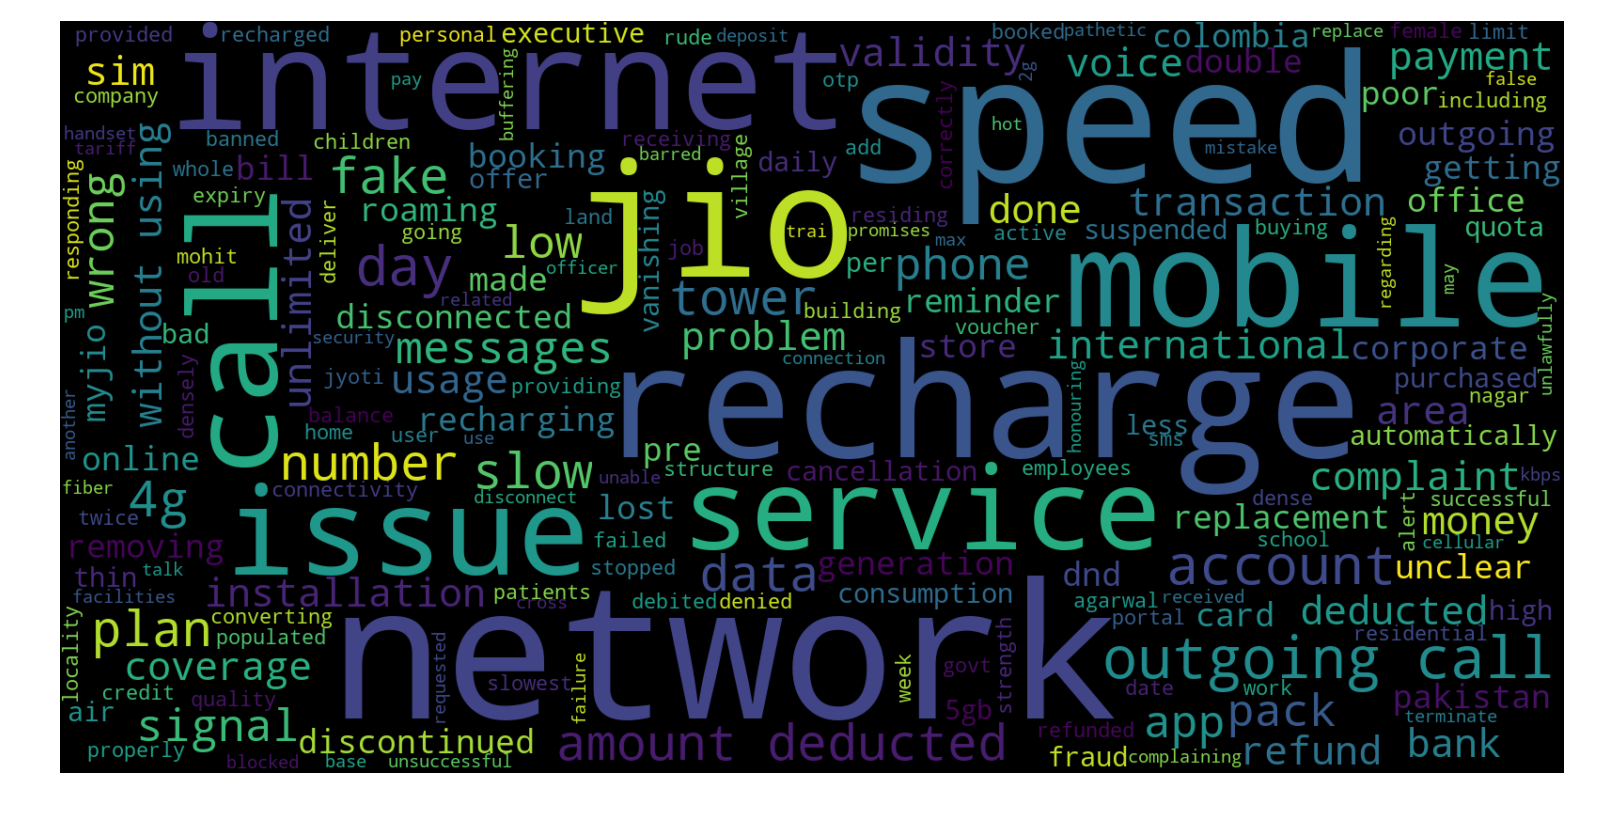

In [42]:
from wordcloud import WordCloud
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

complaint_string = []
for t in actualComplaints:
    complaint_string.append(t)
complaint_string = pd.Series(complaint_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(complaint_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()